In [3]:
import sys
print(sys.executable)

c:\Users\lynda\OneDrive\Bureau\sousou\venv\Scripts\python.exe


In [5]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pandas numpy matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.3 MB 762.0 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/11.3 MB 882.6 kB/s eta 0:00:12


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load datasets
# Load datasets - absolute path
equipment = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/synthetic/equipment.csv')
maintenance = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/synthetic/maintenance_records.csv')
failures = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/synthetic/failure_events.csv')

print(f"📊 Dataset Sizes:")
print(f"   Equipment: {len(equipment):,} records")
print(f"   Maintenance: {len(maintenance):,} records")
print(f"   Failures: {len(failures):,} records")
print(f"   Total Events: {len(maintenance) + len(failures):,}")

# Convert dates
equipment['purchase_date'] = pd.to_datetime(equipment['purchase_date'])
maintenance['maintenance_date'] = pd.to_datetime(maintenance['maintenance_date'])
failures['failure_date'] = pd.to_datetime(failures['failure_date'])

print("\n✅ Data loaded and dates converted")

📊 Dataset Sizes:
   Equipment: 100 records
   Maintenance: 2,093 records
   Failures: 656 records
   Total Events: 2,749

✅ Data loaded and dates converted


🚜 Equipment Distribution by Type:

equipment_type
Tractor              45
Irrigation System    20
Harvester            15
Planter              12
Sprayer               8
Name: count, dtype: int64


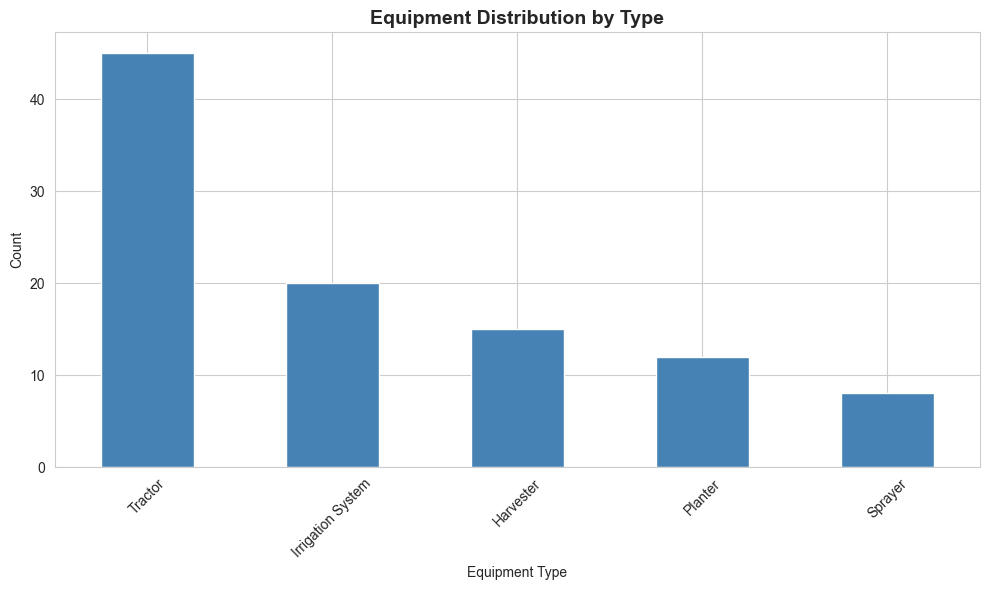

In [3]:
# Equipment distribution
print("🚜 Equipment Distribution by Type:\n")
print(equipment['equipment_type'].value_counts())

# Visualize
equipment['equipment_type'].value_counts().plot(kind='bar', color='steelblue', figsize=(10, 6))
plt.title('Equipment Distribution by Type', fontsize=14, fontweight='bold')
plt.xlabel('Equipment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📊 Equipment Age Statistics:

count    100.000000
mean       7.220000
std        3.465792
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: age, dtype: float64


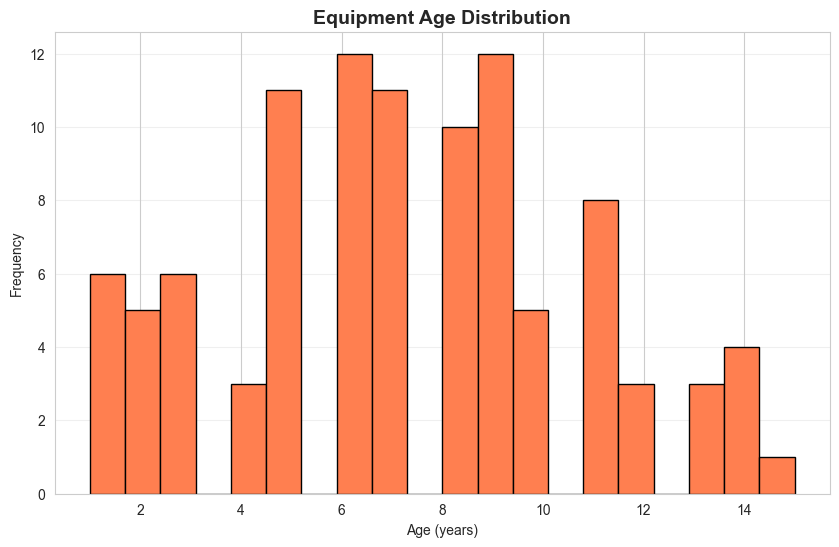

In [4]:
# Calculate age
current_year = datetime.now().year
equipment['age'] = current_year - equipment['year_manufactured']

print("📊 Equipment Age Statistics:\n")
print(equipment['age'].describe())

# Visualize
plt.figure(figsize=(10, 6))
equipment['age'].hist(bins=20, color='coral', edgecolor='black')
plt.title('Equipment Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

🌍 Equipment Distribution by Tunisian Regions:

location
Parcelle Est (Jendouba)      14
Serre (Nabeul)               11
Champ Sud (Kairouan)         11
Oliveraie (Sfax)             10
Parcelle Ouest (Siliana)      9
Hangar Principal              8
Champ Céréales (Manouba)      8
Verger (Cap Bon)              8
Dépôt Matériel                7
Zone Irrigation (Bizerte)     7
Champ Nord (Béja)             5
Atelier Mécanique             2
Name: count, dtype: int64


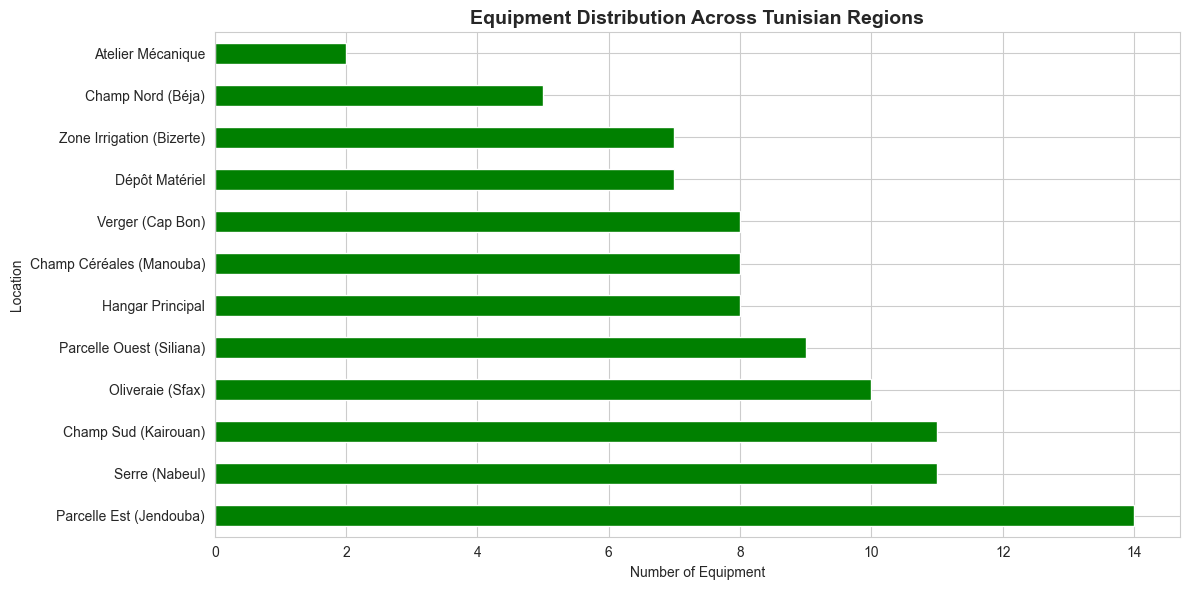

In [5]:
# Equipment by location
print("🌍 Equipment Distribution by Tunisian Regions:\n")
print(equipment['location'].value_counts())

# Visualize
plt.figure(figsize=(12, 6))
equipment['location'].value_counts().plot(kind='barh', color='green')
plt.title('Equipment Distribution Across Tunisian Regions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Equipment')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

🔧 Maintenance Type Distribution:

type_name
Corrective    1064
Preventive     809
Predictive     220
Name: count, dtype: int64

Preventive Maintenance: 38.7%


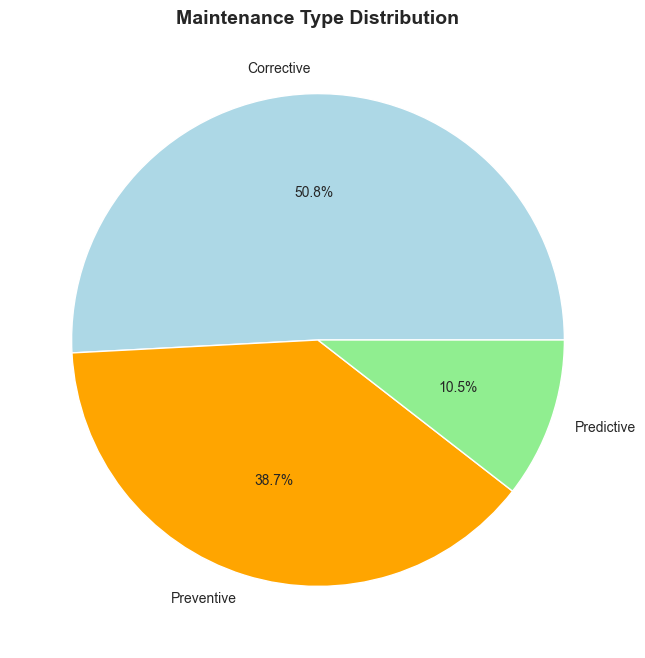

In [6]:
# Maintenance types
type_mapping = {1: 'Preventive', 2: 'Corrective', 3: 'Predictive'}
maintenance['type_name'] = maintenance['type_id'].map(type_mapping)

print("🔧 Maintenance Type Distribution:\n")
print(maintenance['type_name'].value_counts())

preventive_pct = (maintenance['type_name']=='Preventive').sum()/len(maintenance)*100
print(f"\nPreventive Maintenance: {preventive_pct:.1f}%")

# Visualize
maintenance['type_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                              colors=['lightblue', 'orange', 'lightgreen'],
                                              figsize=(8, 8))
plt.title('Maintenance Type Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

💰 Maintenance Cost Statistics (TND):

             count        mean         std     min      25%      50%  \
type_name                                                              
Corrective  1064.0  675.705564  275.134089  156.23  472.135  618.510   
Predictive   220.0  453.857091  221.120509  132.24  312.855  406.615   
Preventive   809.0  280.305328  120.685153   71.64  196.870  259.270   

                 75%      max  
type_name                      
Corrective  812.5150  2597.03  
Predictive  532.3975  1955.05  
Preventive  340.8400  1219.81  

Total Maintenance Cost: 1,045,566.29 TND
Average Cost per Event: 499.55 TND


<Figure size 1000x600 with 0 Axes>

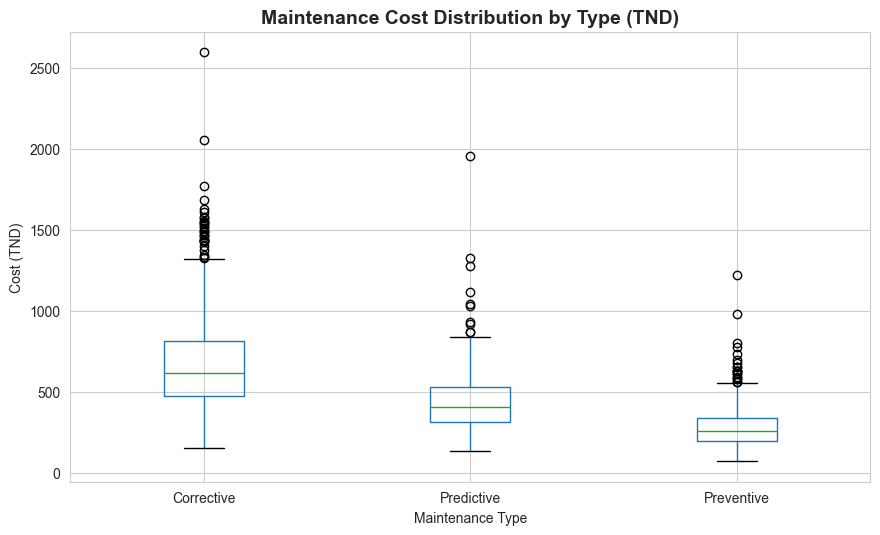

In [7]:
# Cost statistics
print("💰 Maintenance Cost Statistics (TND):\n")
print(maintenance.groupby('type_name')['total_cost'].describe())
print(f"\nTotal Maintenance Cost: {maintenance['total_cost'].sum():,.2f} TND")
print(f"Average Cost per Event: {maintenance['total_cost'].mean():,.2f} TND")

# Visualize
plt.figure(figsize=(10, 6))
maintenance.boxplot(column='total_cost', by='type_name', figsize=(10, 6))
plt.title('Maintenance Cost Distribution by Type (TND)', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Maintenance Type')
plt.ylabel('Cost (TND)')
plt.show()

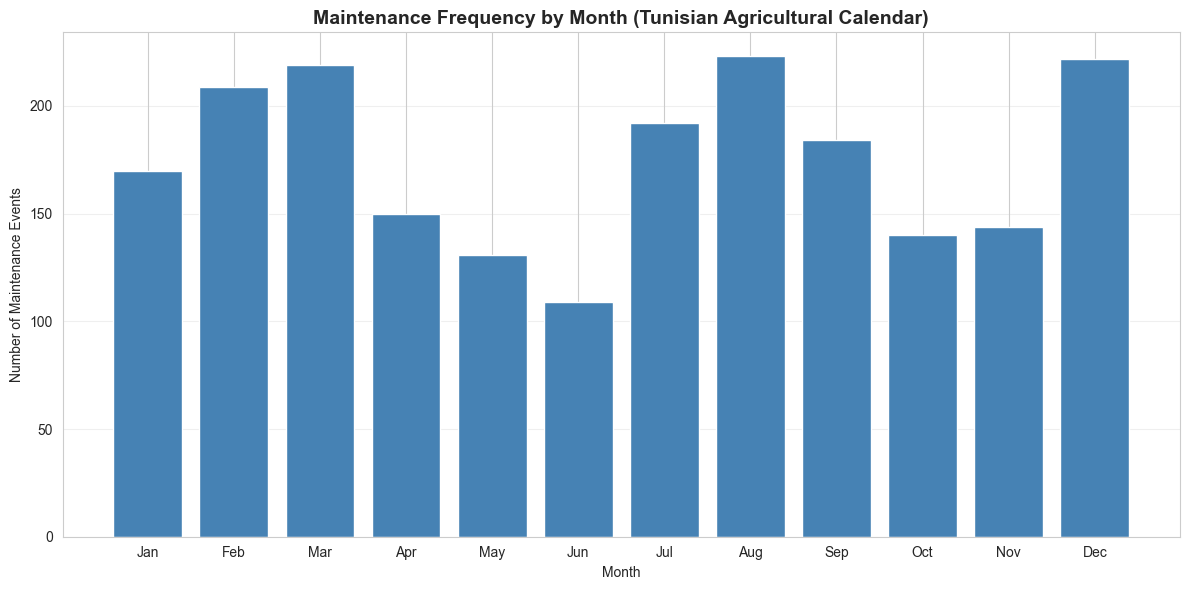


🔑 Key Observations:
   - February: Winter maintenance peak
   - June: Cereal harvest (lower maintenance)
   - November: Planting + olive harvest season


In [8]:
# Monthly patterns
maintenance['month'] = maintenance['maintenance_date'].dt.month
monthly_pattern = maintenance.groupby('month').size()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), monthly_pattern.values, color='steelblue')
plt.xticks(range(1, 13), month_names)
plt.title('Maintenance Frequency by Month (Tunisian Agricultural Calendar)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Events')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔑 Key Observations:")
print("   - February: Winter maintenance peak")
print("   - June: Cereal harvest (lower maintenance)")
print("   - November: Planting + olive harvest season")

⚠️ Failure Type Distribution:

failure_type
Hydraulic     158
Engine        143
Mechanical    113
Electrical     94
Tire           78
Belt           43
Other          27
Name: count, dtype: int64


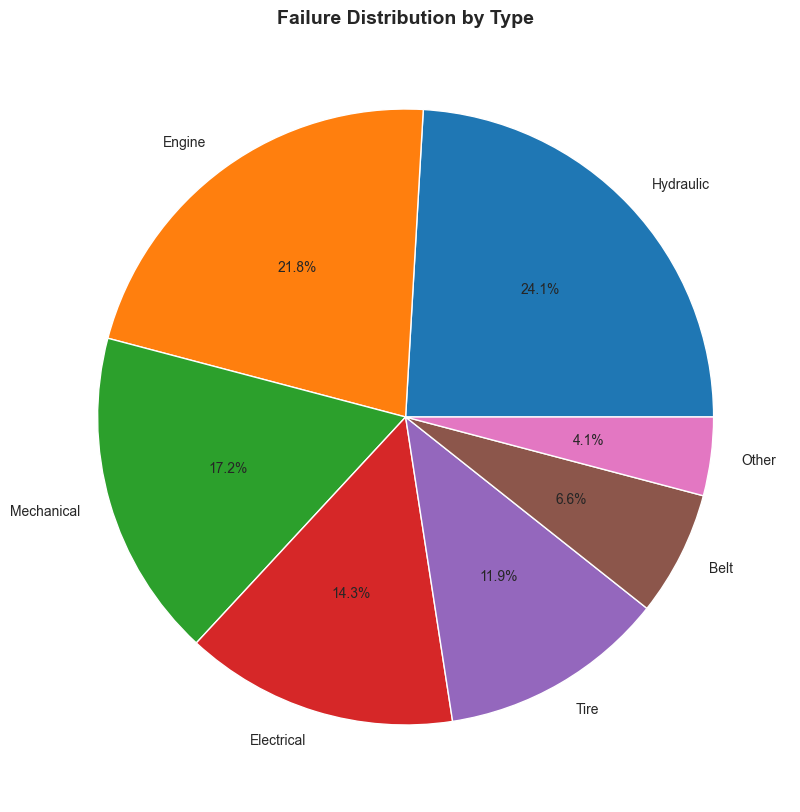

In [9]:
# Failure types
print("⚠️ Failure Type Distribution:\n")
print(failures['failure_type'].value_counts())

# Visualize
failures['failure_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                              figsize=(10, 10))
plt.title('Failure Distribution by Type', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

In [10]:
# Severity distribution
print("🔴 Failure Severity Distribution:\n")
print(failures['severity'].value_counts())

# Costs
print("\n💸 Failure Cost Statistics (TND):\n")
print(failures.groupby('severity')['repair_cost'].describe())
print(f"\nTotal Failure Cost: {failures['repair_cost'].sum():,.2f} TND")

# Preventable failures
preventable = failures['prevented_by_maintenance'].sum()
preventable_pct = (preventable / len(failures)) * 100
preventable_cost = failures[failures['prevented_by_maintenance']==True]['repair_cost'].sum()

print(f"\n🎯 Preventable Failures: {preventable} ({preventable_pct:.1f}%)")
print(f"   Potential Cost Savings: {preventable_cost:,.2f} TND")

🔴 Failure Severity Distribution:

severity
Minor       406
Moderate    191
Critical     59
Name: count, dtype: int64

💸 Failure Cost Statistics (TND):

          count         mean          std      min        25%       50%  \
severity                                                                  
Critical   59.0  6145.415254  2145.983514  2970.66  4137.3650  5966.140   
Minor     406.0   345.156379    84.670500   201.54   273.2575   343.115   
Moderate  191.0  1246.083403   422.619686   510.40   890.6500  1261.330   

               75%      max  
severity                     
Critical  7724.045  9804.30  
Minor      414.270   499.77  
Moderate  1633.825  1984.59  

Total Failure Cost: 740,714.92 TND

🎯 Preventable Failures: 401 (61.1%)
   Potential Cost Savings: 466,670.63 TND


In [11]:
print("="*80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n🚜 EQUIPMENT INSIGHTS:")
print(f"   • Total Equipment: {len(equipment)} units")
print(f"   • Most Common: {equipment['equipment_type'].value_counts().index[0]}")
print(f"   • Average Age: {equipment['age'].mean():.1f} years")

print("\n🔧 MAINTENANCE INSIGHTS:")
print(f"   • Total Events: {len(maintenance):,}")
print(f"   • Preventive Rate: {preventive_pct:.1f}%")
print(f"   • Total Cost: {maintenance['total_cost'].sum():,.2f} TND")

print("\n⚠️ FAILURE INSIGHTS:")
print(f"   • Total Failures: {len(failures):,}")
print(f"   • Preventable: {preventable_pct:.1f}%")
print(f"   • Potential Savings: {preventable_cost:,.2f} TND")

print("\n💡 RECOMMENDATIONS:")
print("   1. Increase preventive maintenance to reduce failures")
print("   2. Focus on June/November (peak failure months)")
print("   3. Target irrigation systems (high usage)")
print("   4. Implement predictive maintenance")

print("\n🇹🇳 TUNISIAN CONTEXT:")
print("   • Cereal harvest (May-June) shows peak stress")
print("   • Olive harvest (Nov-Jan) increases needs")
print("   • Irrigation critical due to water scarcity")

KEY INSIGHTS & RECOMMENDATIONS

🚜 EQUIPMENT INSIGHTS:
   • Total Equipment: 100 units
   • Most Common: Tractor
   • Average Age: 7.2 years

🔧 MAINTENANCE INSIGHTS:
   • Total Events: 2,093
   • Preventive Rate: 38.7%
   • Total Cost: 1,045,566.29 TND

⚠️ FAILURE INSIGHTS:
   • Total Failures: 656
   • Preventable: 61.1%
   • Potential Savings: 466,670.63 TND

💡 RECOMMENDATIONS:
   1. Increase preventive maintenance to reduce failures
   2. Focus on June/November (peak failure months)
   3. Target irrigation systems (high usage)
   4. Implement predictive maintenance

🇹🇳 TUNISIAN CONTEXT:
   • Cereal harvest (May-June) shows peak stress
   • Olive harvest (Nov-Jan) increases needs
   • Irrigation critical due to water scarcity


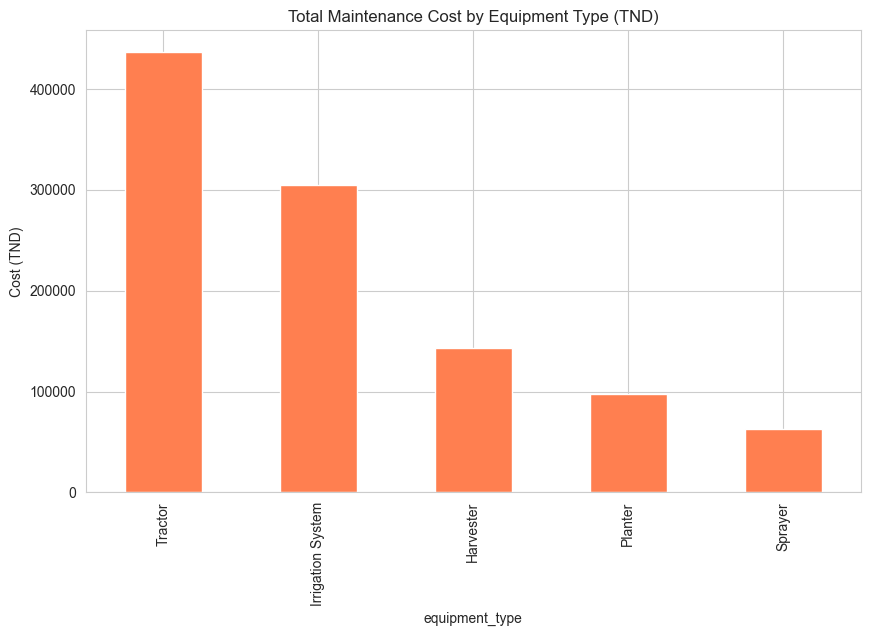

In [12]:
# Add this cell
equipment_costs = maintenance.merge(equipment[['equipment_id', 'equipment_type']], on='equipment_id')
cost_by_type = equipment_costs.groupby('equipment_type')['total_cost'].sum().sort_values(ascending=False)
cost_by_type.plot(kind='bar', color='coral', figsize=(10, 6))
plt.title('Total Maintenance Cost by Equipment Type (TND)')
plt.ylabel('Cost (TND)')
plt.show()

In [13]:
# Add this cell
failures_per_equipment = failures.groupby('equipment_id').size()
equipment_with_failures = equipment.merge(failures_per_equipment.reset_index(name='failure_count'), 
                                          on='equipment_id', how='left')
equipment_with_failures['failure_count'] = equipment_with_failures['failure_count'].fillna(0)
equipment_with_failures['mtbf'] = equipment_with_failures.apply(
    lambda x: x['operating_hours'] / x['failure_count'] if x['failure_count'] > 0 else np.inf, axis=1
)

mtbf_by_type = equipment_with_failures[equipment_with_failures['mtbf'] != np.inf].groupby('equipment_type')['mtbf'].mean()
print("⚡ MTBF by Equipment Type (hours):\n", mtbf_by_type.round(0))

⚡ MTBF by Equipment Type (hours):
 equipment_type
Harvester             305.0
Irrigation System    1485.0
Planter               408.0
Sprayer               358.0
Tractor               886.0
Name: mtbf, dtype: float64


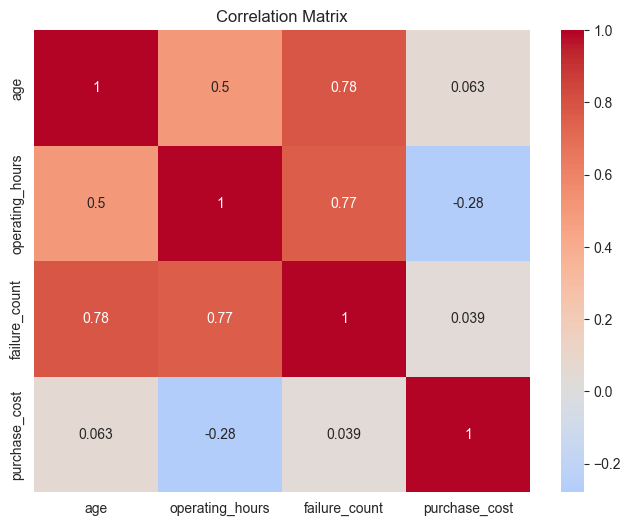

In [14]:
# Equipment age vs failures correlation
import seaborn as sns
corr_data = equipment_with_failures[['age', 'operating_hours', 'failure_count', 'purchase_cost']]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()